# Setup

## Permisos a nivel cuenta (CloudShell)

CloudShell es un entorno a nivel cuenta, donde se activa una pequeña VM que tiene contacto con toda la suite. Es ideal para hacer setups de permisos, levantar cositas muy chicas (crear un bucket, etc).

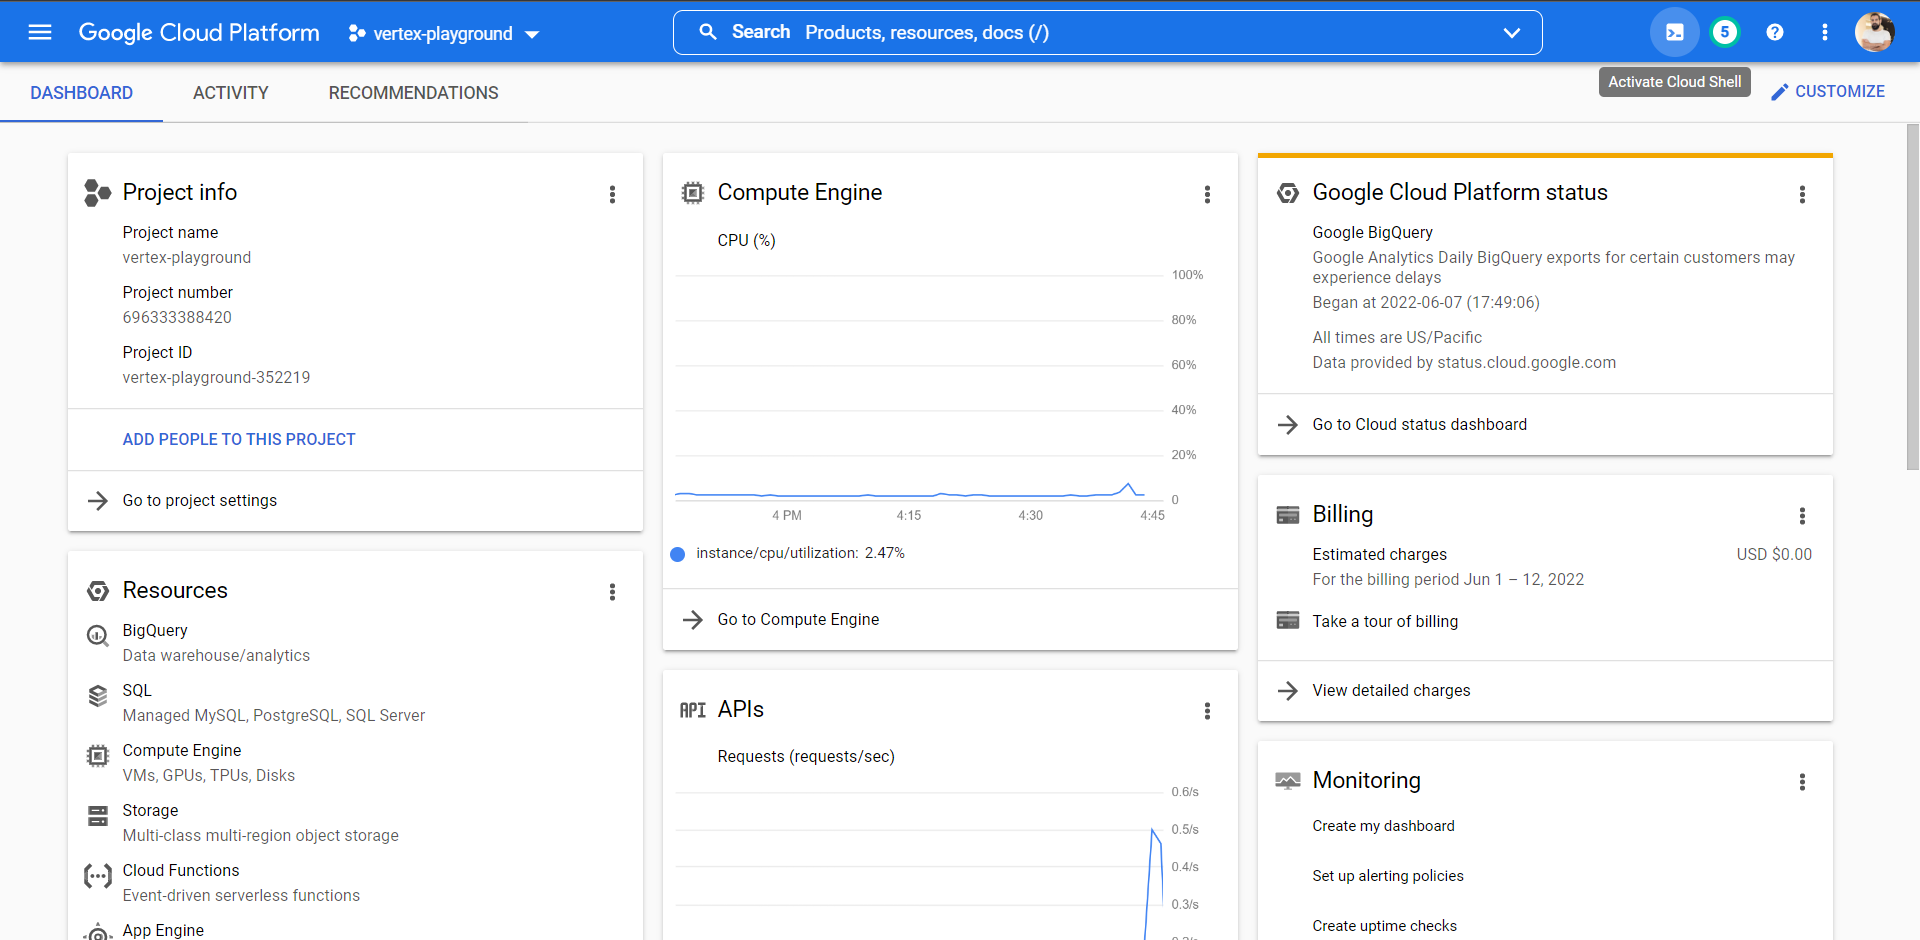

Si es una cuenta nueva, tenemos que activar las APIs de algunos servicios necesarios a lo largo del workshop.

In [ ]:
# Esto va en CloudShell

# gcloud services enable compute.googleapis.com         \
#                        containerregistry.googleapis.com  \
#                        aiplatform.googleapis.com \
#                        cloudbuild.googleapis.com \
#                        cloudfunctions.googleapis.com

También puede que tengamos que autodarnos permisos de admin para escribir sobre los buckets de GCS. 

**Importante**: Si estás en un entorno laboral, chequeá antes con tu devops/architect para que no hacer macanas! :)

In [ ]:
# CloudShell
#
# gcloud projects describe $GOOGLE_CLOUD_PROJECT > project-info.txt
# PROJECT_NUM=$(cat project-info.txt | sed -nre 's:.*projectNumber\: (.*):\1:p')
# SVC_ACCOUNT="${PROJECT_NUM//\'/}-compute@developer.gserviceaccount.com"
# gcloud projects add-iam-policy-binding $GOOGLE_CLOUD_PROJECT --member serviceAccount:$SVC_ACCOUNT --role roles/storage.objectAdmin

## Librerías y creación de infraestructura

Para este workshop necesitamos crear dos buckets que serán usados como depósitos de artefactos y demás menesteres propios de GCP.

Hay un archivo de requirements.txt con las librerías y dependencias que vamos a necesitar. Para instalar, descomentá la celda de abajo y ejecutala sólo uan vez.

In [ ]:
# !pip install -r requirements.txt

Ahora que tenemos todo instalado, podemos ejecutar lo siguiente:

In [3]:
from datetime import datetime
import os

PROJECT_ID = ""

# Get your Google Cloud project ID from gcloud
if not os.getenv("IS_TESTING"):
    shell_output=!gcloud config list --format 'value(core.project)' 2>/dev/null
    PROJECT_ID = shell_output[0]

    
PATH=%env PATH
%env PATH={PATH}:/home/jupyter/.local/bin


TIMESTAMP =datetime.now().strftime("%Y%m%d%H%M%S")
REGION="us-central1"

print("")
print("Algunas variables que necesitamos:")
print("Nuestro Project ID es: ", PROJECT_ID)
print("Nuestra región es: ", REGION)
print("Timestamp: ", TIMESTAMP)


env: PATH=/usr/local/cuda/bin:/opt/conda/bin:/opt/conda/condabin:/usr/local/bin:/usr/bin:/bin:/usr/local/games:/usr/games:/home/jupyter/.local/bin

Algunas variables que necesitamos:
Nuestro Project ID es:  vertex-playground-352219
Nuestra región es:  us-central1
Timestamp:  20220614184455


---

Siempre que estemos en algún servicio cloud tenemos que tener presentes algunas variables como el nombre del proyecto y la región, que son elementos claves para interactuar con la nube mediante el uso de las APIs y SDKs.

Primero creamos una variable con el nombre de los buckets, con un pequeño detalle: dado que el nombre del bucket integra el Project ID (que es único a nivel global) sabemos que siempre vamos a poder ejecutarlo. 

In [11]:
BUCKET_01 = f'{PROJECT_ID}-vertex-01-automl'
BUCKET_02 = f'{PROJECT_ID}-vertex-02-customtraining'

print('Bucket del primer workshop: ', BUCKET_01)
print('Bucket del segundo workshop: ', BUCKET_02)

Bucket del primer workshop:  vertex-playground-352219-vertex-01-automl
Bucket del segundo workshop:  vertex-playground-352219-vertex-02-customtraining


Recordá que la celda de arriba va a cambiar: *vertex-playground-352219* es el nombre del proyecto de la cuenta de **deployr** que estamos usando en este workshop.

---

Ahora sí, mediante el uso de una pequeña función de ayuda, creamos los buckets que vamos a usar.

In [8]:
from google.cloud import storage


def create_bucket_class_location(bucket_name, location):
    storage_client = storage.Client()

    bucket = storage_client.bucket(bucket_name)
    new_bucket = storage_client.create_bucket(bucket, location=location)

    print(
        "Created bucket {} in {} ".format(
            new_bucket.name, new_bucket.location
        )
    )
    return new_bucket

In [12]:
bucket_01 = create_bucket_class_location(BUCKET_01, REGION)

Created bucket vertex-playground-352219-vertex-01-automl in US-CENTRAL1 


In [13]:
bucket_02 = create_bucket_class_location(BUCKET_02, REGION)

Created bucket vertex-playground-352219-vertex-02-customtraining in US-CENTRAL1 
